# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [9]:
# Extract all rows of data
weather_table = soup.find('tbody')
weather_rows = weather_table.find_all('tr', class_='data-row') 


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [17]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in weather_rows:
	# Create an empty dictionary for row data
	data = []
	#Secondary loop for table data
	for td in row.find_all('td'):
		data.append(td.text)
	# Append the dictionary to the list
	weather_data.append(data)

#Show the beginning of the list
print(weather_data[:5])

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]


In [18]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Scrape the column names
columns = [th.text for th in weather_table.find_all('th')]

# Create the DataFrame
weather_df = pd.DataFrame(weather_data, columns=columns)


In [21]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [22]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [26]:
# Change data types for data analysis
weather_df_cleaned = weather_df.astype({'id': 'object', 'terrestrial_date': 'datetime64[ns]', 'sol': 'int32', 
										"ls": 'int32', 'month':'int32', 'min_temp': 'float64', 'pressure': 'float64'})

In [27]:
# Confirm type changes were successful by examining data types again
weather_df_cleaned.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
# Count the number of unique months
months = weather_df_cleaned['month'].nunique()
print(f"There are {months} months on Mars.")

There are 12 months on Mars.


In [35]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sols
sols = weather_df_cleaned['sol'].nunique()
print(f"There are {sols} sols (Martian days) worth of data.")

There are 1867 sols (Martian days) worth of data.


In [36]:
# 3. What is the average minimum temperature by month?
# Group the data by month and calculate the average minimum temperature
average_min_temp = weather_df_cleaned.groupby('month')['min_temp'].mean()
print(f"The average minimum temperature by month is:\n{average_min_temp}")

The average minimum temperature by month is:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


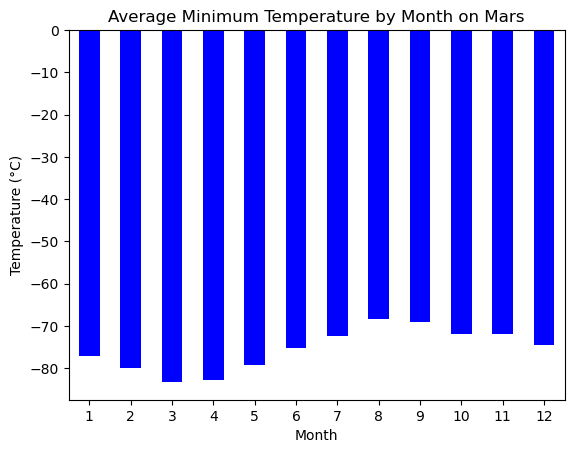

<Figure size 640x480 with 0 Axes>

In [40]:
# Plot the average minimum temperature by month in a bar chart
average_min_temp.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

#Export image to outputs folder
plt.savefig('outputs/average_min_temp_by_month.png')

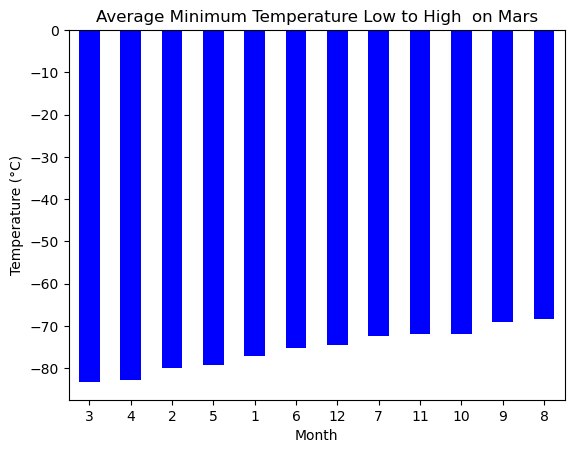

<Figure size 640x480 with 0 Axes>

In [43]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
#Sort the the data to identify the coldest and hottest months
sorted_average_min_temp = average_min_temp.sort_values()

#plot the sorted data
sorted_average_min_temp.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature Low to High  on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

#Export image to outputs folder
plt.savefig('outputs/average_min_temp_low_to_high.png')

In [44]:
# 4. What is the average pressure by month?
# Group the data by month and calculate the average pressure
average_pressure = weather_df_cleaned.groupby('month')['pressure'].mean()
print(f"The average pressure by month is:\n{average_pressure}")

The average pressure by month is:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


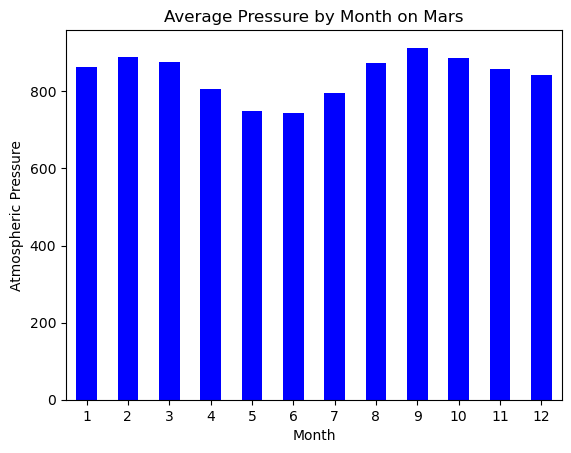

<Figure size 640x480 with 0 Axes>

In [46]:
# Plot the average pressure by month in a bar chart
average_pressure.plot(kind='bar', color='blue')
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

#Export image to outputs folder
plt.savefig('outputs/average_pressure_by_month.png')

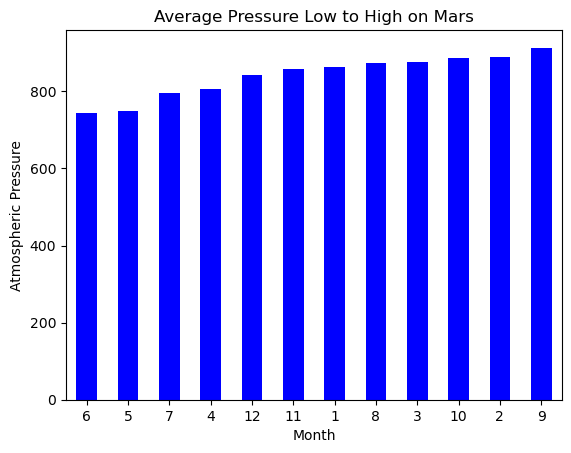

<Figure size 640x480 with 0 Axes>

In [47]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the data to identify the lowest and highest pressure months
sorted_average_pressure = average_pressure.sort_values()

# Plot the sorted data
sorted_average_pressure.plot(kind='bar', color='blue')
plt.title('Average Pressure Low to High on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

#Export image to outputs folder
plt.savefig('outputs/average_pressure_low_to_high.png')

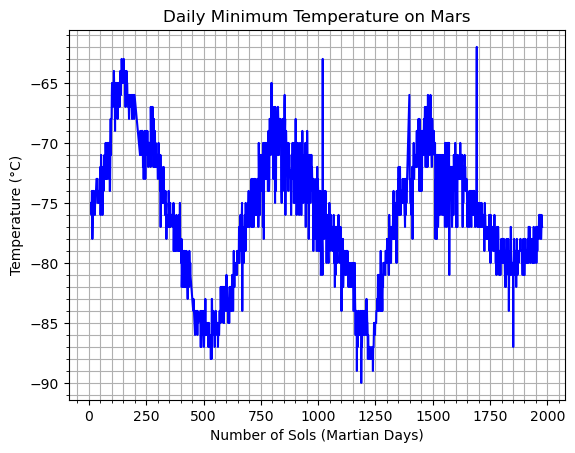

<Figure size 640x480 with 0 Axes>

In [75]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature on Mars
weather_df_cleaned.plot(x='sol', y='min_temp', color='blue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Number of Sols (Martian Days)')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(which='both')
plt.legend().remove()
plt.show()

#Export image to outputs folder
plt.savefig('outputs/daily_min_temp.png')

#### Minimum Temperature

According to the data the 3rd month or Martian "March" has the lowest average temperature. 

#### Atmospheric Pressure

According to the data month 6 or Martian "June" has the lowest average pressure. 

#### Year Length
Referencing number of peaks we can infer the number of years.
Referencing the distance from one peak to the next we can estimate the years length. 

The first being roughly 650.
Second being roughly 700.
The third being rougly 675.

The average would be 675.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [76]:
# Write the data to a CSV
weather_df_cleaned.to_csv('outputs/mars_weather_data.csv', index=False)


In [77]:
browser.quit()